# 2.1 실제 데이터로 작업하기

- 유명한 공개 데이터 저장소
    - UC Irvine 머신러닝 저장소: (http://archive.ics.uci.edu/ml)
    - 캐글 데이터셋: (http://www.kaggle.com/datasets)
    - 아마존 AWS 데잍터셋: (https://registry.opendata.aws)
- 메타 포털(공개 데이터 저장소가 나열되어 있음)
    - 데이터 포털: (http://dataportals.org)
    - 오픈 데이터 모니터: (http://opendatamonitor.eu)
    - 퀀들: (http://quandl.com)
- 인기 있는 공개 데이터 저장소가 나열되어 있는 다른 페이지
    - 위키백과 머신러닝 데이터셋 목록: (https://goo.gl/SJHN2K)
    - Quora.com: (https://homl.info/10)
    - 데이터셋 서브레딧: (http://www.reddit.com/r/datasets)
- StatLib 저장소에 있는 캘리포니아 주택 가격 테이터셋을 이용하여 학습

---

# 2.2 큰 그림 보기

- 블록 그룹: 미국 인구조사국에서 샘플 데이터를 발표하는데 사용하는 최소한의 지리적 단위
- 데이터셋은 블록 그룹마다 인구, 중간 소득, 중간 주택 가격 등을 담고 있음
- 새 데이터가 주어졌을 때 구역의 중간 주택 가격을 예측하는 것이 모표

### 2.2.1 문제 정의

- 비지니스 목적이 무엇인지를 명확히 결정해야 한다(여기서는 이 모델의 출력이 투자를 결정하는 다른 머신러닝 시스템의 입력으로 사용됨).

> 파이프라인  
> 데이터 처리 컴포넌트들이 연속되어 있는 것.  
> 각 컴포넌트는 비동기적, 독립적으로 동작

- 현재 구현되어 있는 솔루션의 유무나 상태를 확인해야 한다.
- 문제의 정의: 이 데이터셋 분석은 회귀(다중 회귀)이며, 배치 학습에 적절하다.

### 2.2.2 성능 측정 지표 선택

- 회귀 문제의 전형적인 성능 지표는 **평균 제곱근 오차**<sup>root mean square error</sup>(RMSE) 이다.

> $RMSE(X, h) = \sqrt{{\frac{1}{m}}\sum_{i=1}^m(h(x^{(i)}) - y^{(i)})^2}$  
> 유클리디안 노름<sup>Euclidean norm</sup>, $\ell_2$ 노름, $\lVert\cdot\rVert_2$ 또는 $\lVert\cdot\rVert$로 표시  
> 이상치가 드물 경우 매우 잘 맞음

> 표기법  
> $m$: 데이터셋에 있는 샘플 수  
> $x^{(i)}$: 데이터셋 중 i 번째 샘플의 전체 특성값(레이블 제외)의 벡터  
> $y^{(i)}$: 데이터셋의 i 번째에 해당하는 레이블 또는 기대 출력값  
> $X$: 데이터셋에 있는 모든 샘플의 모든 특성값(레이블 제외)을 포함하는 행렬. 샘플 하나는 하나의 행에 해당  
> 스칼라나 함수는 이탤릭 소문자, 벡터는 굵은 소문자, 행렬은 굵은 대문자로 표시

- 이상치가 많은 경우 **평균 절대 오차**<sup>mean absolute error</sup>(MAE)를 고려해볼 수도 있다.

> $MAE(X, h) = {\frac{1}{m}}\sum_{i=1}^m\vert h(x^{(i)}) - y^{(i)}\vert$  
> 맨해튼 노름<sup>Manhattan norm</sup>, $\ell_1$ 노름, $\lVert\cdot\rVert_1$로 표시

> 일반적으로 원소가 $n$개인 벡터 $v$의 노름은 $\lVert v \rVert_k = (\vert v_0 \vert^k + \vert v_1 \vert^k + \cdots + \vert v_n \vert^k)^{\frac{1}{k}}$  
> $\ell_0$는 단순히 벡터에 있는 0이 아닌 원소 수, $\ell_\infty$는 벡터에서 가장 큰 절댓값

### 2.2.3 가정 검사

- 지금까지의 가정을 나열하고 검사해야 한다!

---

# 2.3 데이터 가져오기

### 2.3.1 작업 환경 만들기

- 생략

### 2.3.2 데이터 다운로드

- 데이터를 추출하는 함수

In [1]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

- 데이터를 읽어들이는 함수

In [2]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [3]:
fetch_housing_data()
housing = load_housing_data()

### 2.3.3 데이터 구조 훑어보기

- 처음 다섯 행 확인

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- 데이터 정보 확인

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- 범주형 데이터인 ocean_proximity에 대해 카테고리 정보 확인

In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

- 수치형 데이터에 대한 특성 요약

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


- 데이터의 형태를 빠르게 검토하기 위해 숫자형 특성을 히스토그램으로 그려본다.

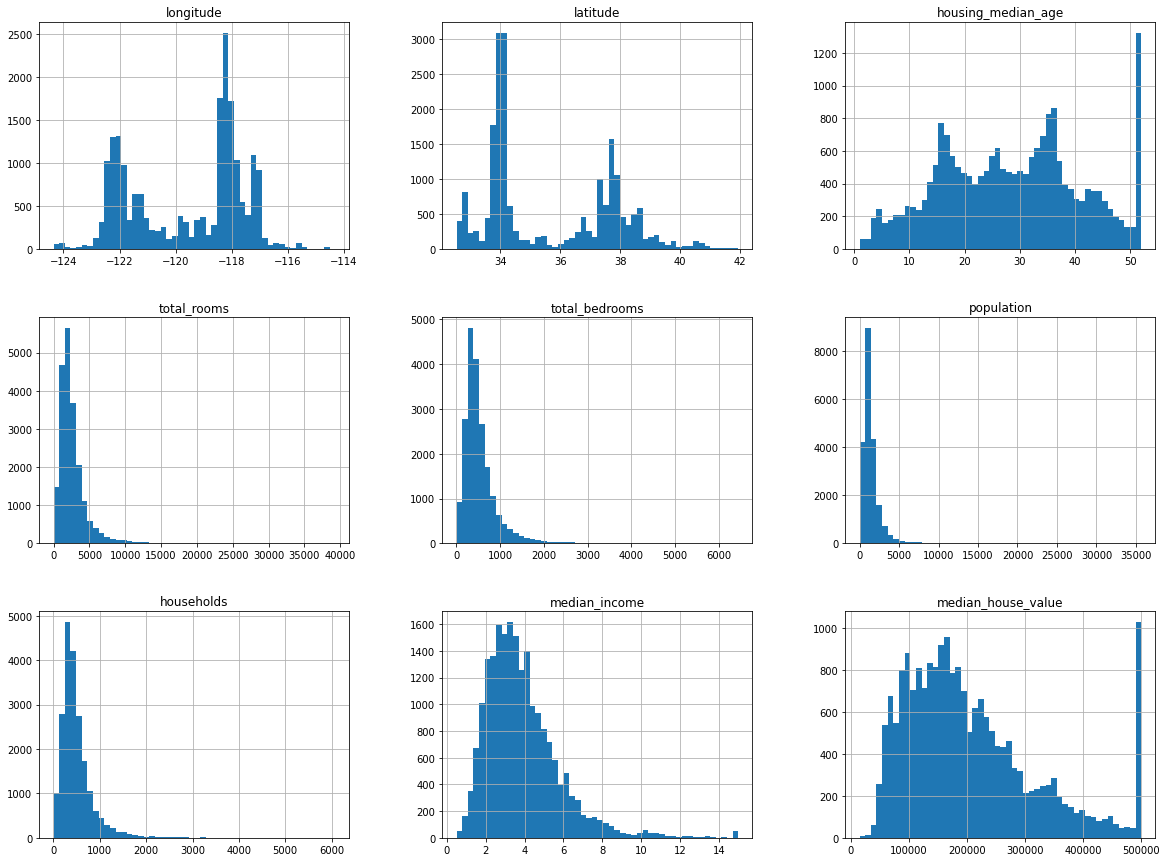

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20, 15))
plt.show()

- 히스토그램에서 나타나는 데이터 특성
    - 중간 소득은 상한이 15, 하한이 0.5이며 단위는 만달러이다.
    - 중간 주택 연도와 중간 주택 가격 역시 상한과 하한이 한정되어 있다. 이를 해결하기 위해 아래와 같은 방법을 사용할 수 있다.
        - 한곗값 밖의 구역에 대한 정확한 레이블을 구한다.
        - 훈련 세트 및 테스트 세트에서 상한을 넘는 값을 제거한다.
    - 특성들의 스케일이 많이 다르다.
    - 많은 히스토그램의 꼬리가 두껍다. 종모양으로 변형이 필요하다.
    
### 2.3.4 테스트 세트 만들기

- 데이터 스누핑 편향<sup>data snooping</sup>: 노출된 테스트 세트로 일반화 오차를 추정할 경우 매우 낙관적인 추정이 되어 실제 예측 시 기대한 성능이 나오지 않게 되는 문제
- 무작위로 데이터 셋의 20% 정도를 분리 

In [9]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), len(test_set))

16512 4128


- 바복 실행 시 전체 데이터세트가 한번씩은 테스트 세트가 되는 상황은 피해야 한다.
- 해결책
    - 처음 실행에서 테스트 세트를 저장하고 다음 실행에서 저장된 테스트 세트를 불러 사용
    - 항상 같은 난수 인덱스가 생성되도록 np.random.permutation() 호출 전에 난수 발생기의 초깃값 지정
    - 샘플의 식별자(의 해시값)를 사용하여 테스트 세트로 보낼지 말지 결정

In [11]:
# 식별자를 사용하여 테스트 세트 분리

from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [12]:
# 현재의 데이터셋에는 식별자가 없으므로 행의 인덱스를 고유 식별자로 사용
# 행의 인덱스를 고유 식별자로 사용하는 경우 새 데이터는 항상 데이터셋의 끝에 추가되어야 하고,
# 어떤 행도 삭제되어서는 안된다.

housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [13]:
# 행 인덱스 사용이 안정적이지 않으므로 위도와 경도를 이용하여 ID로 사용

housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [14]:
# scikit learn의 train_test_split 함수 사용

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

- 데이터셋이 충분히 크지 못하다면 무작위 샘플링은 편향이 생길 수 있다.
- 따라서 모집단의 비율과 동일한 비율로 샘플링(**계층적 샘플링**<sup>stratified sampling</sup>)을 해야 한다.
- 계층적 샘플링을 할 경우 너무 많은 계층으로 나누면 안되며, 각 계층은 충분히 커야 한다.

<AxesSubplot:>

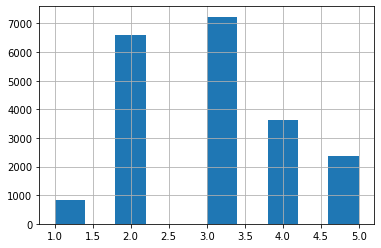

In [15]:
# 소득을 5개 카테고리로 구분한 특성 추가

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

In [16]:
# 소득 카테고리를 기반으로 계층 샘플링 수행

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [17]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [18]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [19]:
# 데이터셋 복원

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

---

# 2.4 데이터 이해를 위한 탐색과 시각화

In [20]:
# 훈련 세트의 복사본 만들기

housing = strat_train_set.copy()

### 2.4.1 지리적 데이터 시각화

- 모든 구역을 산점도로 만들어 데이터를 시각화

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

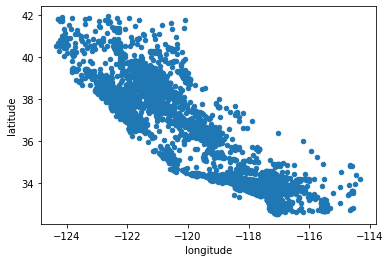

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

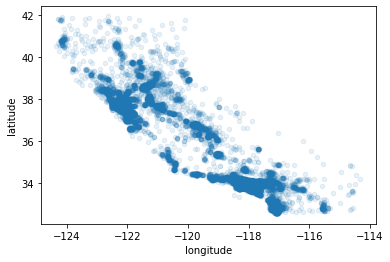

In [22]:
# 데이터 포인트가 밀집된 영역을 표현하기 위해 alpha 값을 0.1로 설정

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

- 추가 매개변수 설정
    - 구역의 인구: 원의 반지름
    - 가격: 색상(낮은 가격은 파란색, 높은 가격은 빨간색)

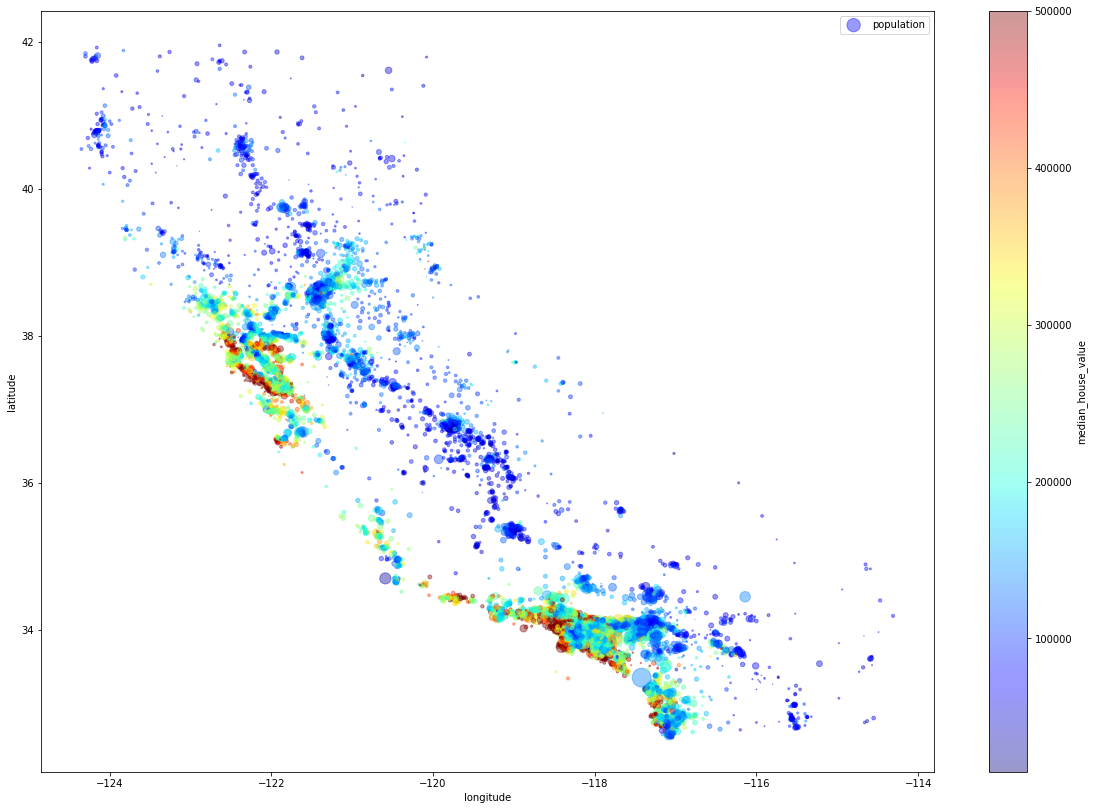

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="population",
            figsize=(20, 14), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend()

### 2.4.2 상관관계 조사

- corr() 함수를 이용하여 모든 특성간의 표준 상관계수<sup>standard correlation codfficient</sup>(피어슨 상관계수, 피어슨의 $r$) 계산
- 범위는 -1 ~ 1이며 1에 가까우면 강한 양의 상관관계, -1에 가까우면 강한 음의 상관관계, 0에 가까우면 상관관계가 거의 없음
- 선형적인 상관계수만 측정
- 그래프의 기울기와는 상관 없고 오직 기울어진 방향만 판단

In [24]:
corr_matrix = housing.corr()

In [25]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

- 판다스의 scatter_matrix 함수를 이용하여 특성 사이의 산점도 그리기

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

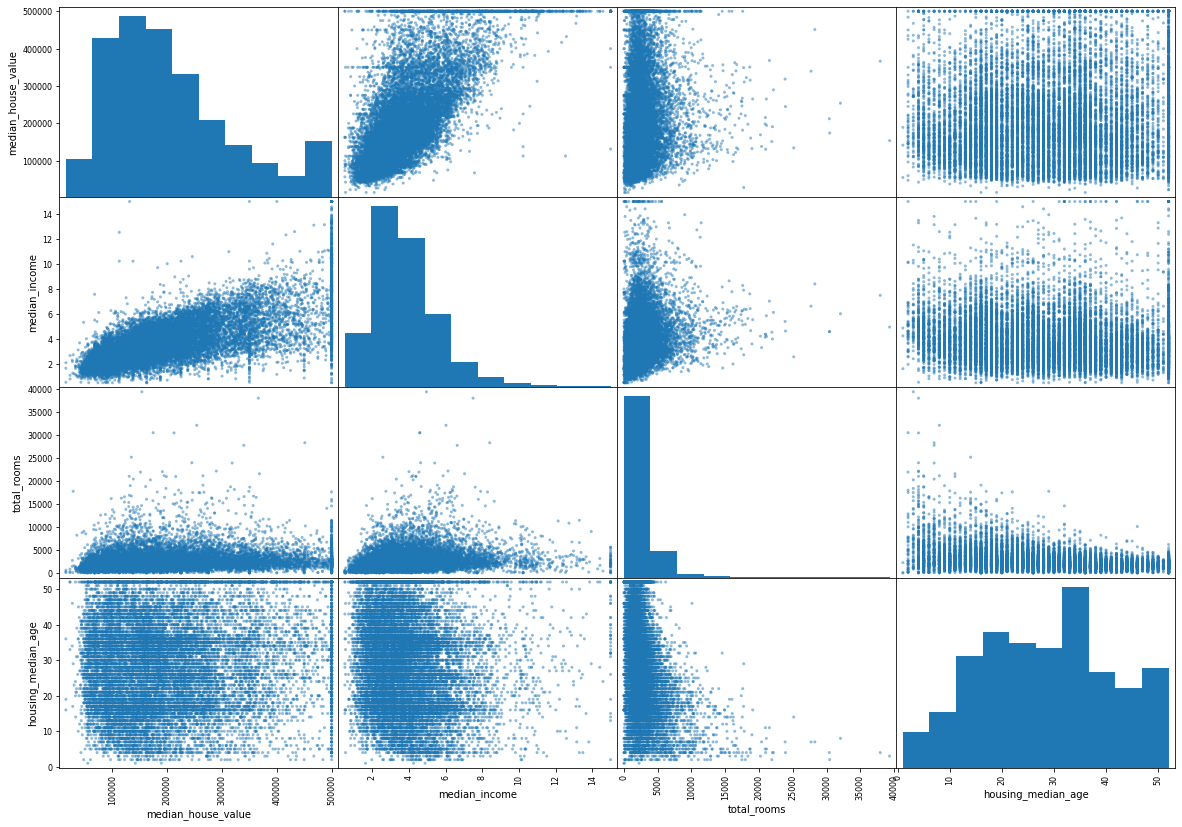

In [26]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(20, 14))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

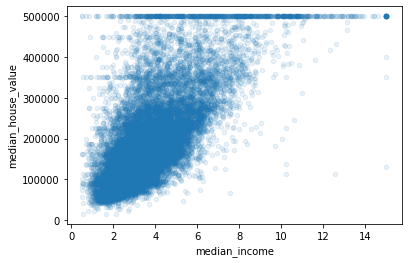

In [27]:
# 가장 유용할 것 같은 median_income 산점도 확대

housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

- 직선 형태의 구간은 제거하는 것이 학습에 좋음

### 2.4.3 특성 조합으로 실험

- 데이터 준비의 마지막 시도로 여러 특성을 조합
- 가구당 방 갯수, 방 개수 당 침실 개수, 가구당 인원 등의 특성 조합

In [28]:
housing["room_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedroom_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [29]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
room_per_household          0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedroom_per_room           -0.259952
Name: median_house_value, dtype: float64

- 데이터를 탐색하여 빨리 통찰을 얻는 것은 중요하나 이는 반복적인 과정이다. 

---

# 2.5 머신러닝 알고리즘을 위한 데이터 준비

- 데이터 준비를 자동화해야 하는 이유
    - 어떤 데이터셋에 대해서도 데이터 변환을 자유롭게 할 수 있다.
    - 향후 프로젝트에 사용할 수 있는 변환 라이브러리를 점진적으로 구축
    - 실제 시스템에서 알고리즘에 새 데이터를 주입하기 전에 변환시키는데 이 함수 사용
    - 여러 가지 데이터 변환을 쉽게 시도해볼 수 있고 어떤 조합이 가장 좋은지 확인하는데 편함

In [30]:
# 데이터셋에서 레이블 분리

housing = strat_train_set.drop("median_house_value", axis=1)
housing_label = strat_train_set["median_house_value"].copy()

### 2.5.1 데이터 정제

- 누락된 특성 처리
    - 해당 구역을 제거
    - 전체 특성값을 삭제
    - 특정 값으로 채움(0, 평균, 중간값 등)

In [31]:
# 해당 구역 제거
#housing.dropna(subset=["total_bedrooms"])

# 전체 특성 삭제
#housing.drop("total_bedrooms", axis=1)

# 특정 값으로 채우기
#median = housing["total_bedrooms"].median()
#housing["total_bedrooms"].fillna(median, inplace=True)

- 사이킷런의 SimpleImputer를 이용하여 누락된 값을 손쉽게 처리 가능

In [32]:
# 누락된 값을 중간값으로 대체하는 경우
# 현재는 total_bedrooms에만 누락 값이 있지만 나중에 어찌될지 모르니 모든 수치형 데이터에 적용

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

# 중간값이 수치형 데이터에서만 만들어질 수 있으므로 범주형 데이터인 ocean_proximity를 제외

housing_num = housing.drop("ocean_proximity", axis=1)

# 훈련 데이터에 적용
# imputer는 각 특성의 중간값을 계산하여 그 결과를 객체의 statistics_ 속성에 저장한다.

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [33]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [34]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [35]:
# 누락된 값을 중간값으로 변환
# 결과는 넘파이 배열

X = imputer.transform(housing_num)

# 결과를 판다스 데이터프레임으로 바꾸기
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [36]:
housing_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,533.939438,1419.687379,497.011810,3.875884
std,2.001828,2.137963,12.574819,2138.417080,410.806260,1115.663036,375.696156,1.904931
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566950
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.000000,602.000000,4.745325
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


- 추정기<sup>estimator</sup> 
    - 데이터셋을 기반으로 일련의 모델 파라미터들을 추정하는 객체
    - fit() 함수에 의해 수행된다.
    - 하나의 매개변수로 하나의 데이터셋만을 전달(지도학습 알고리즘의 경우 매개변수가 2개로 두 번째 매개변수는 레이블)
    - 그밖에 필요한 매개변수들은 모두 하이퍼파라미터로 간주되고 인스턴스 변수로 저장된다.
- 변환기<sup>transformer</sup>
    - 데이터셋을 변환하는 추정기
    - 데이터셋을 매개변수로 받은 transform() 함수가 수행
    - 변환된 데이터셋을 반환
    - 모든 변환기는 fit_transform() 함수를 가지고 있다.
- 예측기<sup>predictor</sup>
    - 추정기 중 데이터셋에 대한 예측을 만들 수 있는 것들
    - predict() 함수가 새로운 데이터셋을 받아 예측값을 반환
    - 테스트 세트를 이용해 품질을 측정하는 score() 함수를 가지고 있다.
    
### 2.5.2 텍스트와 범주형 특성 다루기

In [37]:
# 범주형 특성값 확인하기

housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [38]:
# 범주형 데이터를 수치형으로 변환
# 사이킷런의 OrdinalEncoder 클래스 사용

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [39]:
# categories_ 속성으로 카테고리 목록을 얻을 수 있다.

ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

- 머신러닝은 가까이 있는 두 값이 떨어져 있는 두 값보다 더 비슷하다고 판단한다.
- 따라서 이러한 방식은 순서가 없는 카테고리의 경우 문제가 발생할 수 있다.
- 이를 해결하기 위해 원-핫 인코딩<sup>one-hot-encoding</sup>을 사용한다.
- 사이킷런의 OneHotEncoder를 사용한다.
- OneHotEncoder의 결과는 사이파이<sup>Scipy</sup> 희소 행렬<sup>sparse matrix</sup>(0이 아닌 원소의 위치만 저장)이다.

In [40]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [41]:
# 희소 행렬로 반환된 값을 넘파이 배열로 변환

housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [42]:
# categories_ 속성 확인

cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

> 범주형 특성의 카테고리 수가 많다면 원-핫 인코딩은 많은 수의 입력 특성을 만들어 훈련을 느리게 하고 성능을 감소시킨다.  
> 이런 경우 범주형 입력값을 이 특성과 관련된 숫자형 특성으로 바꾸어 처리하거나 **임베딩**<sup>embedding</sup>이라  
> 부르는 저차원 벡터로 바꿀 수 있다.

### 2.5.3 나만의 변환기

- 변환기를 직접 만들기 위해서는 fit(), transform(), fit_transform() 등을 구현한 클래스를 만들면 된다.
- fit_transform() 메서드는 TransformerMixin을 상속하면 자동으로 생성된다.
- BaseEstimator를 상속하고 생성자에 \*args나 \*\*kargs를 사용하지 않으면 튜닝에 필요한 get_prarams()와 set_params() 함수를 얻을 수 있다.
- add_bedrooms_per_room 하이퍼 파라미터를 받아 bedrooms_per_room 특성 추가 여부를 처리하는 변환기

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder (add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform (housing.values)

### 2.5.4 특성 스케일링

- **특성 스케일링**<sup>feature scaling</sup>은 데이터에 적용할 가장 중요한 변환 중 하나이다.
- 타깃 값에 대한 스케일링은 불필요
- min-max 스케일링(정규화<sup>normalization</sup>)과 표준화<sup>standardization</sup>가 널리 사용됨
    - min-max 스케일링: 데이터에서 최솟값을 뺀 후 최댓값과 최솟값의 차이로 나눔. 사이킷런의 MinMaxScaler 변환기 사용
    - 표준화: 평균을 뺀 후 표준편차로 나누어 결과 분포의 분산이 1이 되도록 함. 어떤 알고리즘에서는 문제가 되나 이상치의 영향을 덜받느다. 사이킷런의 StandardScaler 변환기 사용
    
> 모든 변환기에서 스케일링은 훈련 데이터에 대해서만 fit() 함수를 적용해야 하며,  
> 그 후 훈련 세트와 테스트 세트, 그리고 새로운 데이터에 대해 transform() 함수를 사용한다. 

### 2.5.5 변환 파이프라인

- 사이킷런의 Pipeline 클래스는 연속된 변환을 순서대로 처리할 수 있도록 도와준다.
- 숫자 특성을 처리하는 간단한 파이프라인 예

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribute_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [45]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

- 파이프라인은 이름, 추정기 쌍의 목록을 파라미터로 전달 받는다.
- 마지막 단계는 변환기와 추정기를 모두 사용할 수 있으나 그 외에는 모두 변환기여야 한다.
- 파이프라인의 fit() 함수를 호출하면 모든 변환기의 fit_transform() 함수를 호출하고, 이 때 한 단계의 출력이 다음단계의 입력으로 전달된다.
- 마지막 단계에서는 fit() 함수만 호출된다.
- 파이프라인 객체는 마지막 추정기와 동일한 함수를 제공한다(위 예제이서는 StandardScaler와 동일한 함수 제공).
- 사이킷런의 ColumnTransformer를 이용하여 각 열마다 적절한 변환 적용
- ColumnTransformer는 최종 행렬의 밀집도를 추정하여 밀집도가 임곗값(기본적으로 sparce_threshold=0.3)보다 낮으면 희소 행렬을 그렇지 않으면 밀집 행렬을 반환한다.

In [46]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

# ColumnTransformer은 변환기 이름, 변환기, 변환기가 적용될 열 이름(또는 인덱스)의 목록을 파라미터로 받는다.
# 특정 열을 삭제하고자 하면 변환기 위치에 "drop"을, 변환기를 적용하지 않기를 원한다면 "passthrough" 문자열을 전달한다.
# 예 ("cat", "passthrough", num_attribs)
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

---

# 2.6 모델 선택과 훈련

### 2.6.1 훈련 세트에서 훈련하고 평가하기

- 선형 회귀 모델 훈련

In [47]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_label)

LinearRegression()

In [48]:
some_data = housing.iloc[:5]
some_labels = housing_label[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("예측", lin_reg.predict(some_data_prepared))
print("레이블", list(some_labels))

예측 [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
레이블 [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [49]:
# mean_squared_error 함수를 이용한 RMSE 측정

from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_label, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

- 예측 오차가 크다는 것은 과소적합의 징후
- 과소적합은 특성들이 좋은 정보를 제공하지 못했거나 모델이 충분히 강력하지 못했다는 것

In [50]:
# 더 복잡한 모델인 DecisionTreeRegressor를 이용한 훈련
# DecisionTreeRegressor: 복잡하며 데이터에서 복잡한 비선형 관계를 찾을 수 있다.

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_label)

DecisionTreeRegressor()

In [51]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_label, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_mse

0.0

### 2.6.2 교차 검증을 사용한 평가

- 훈련 세트를 더 작은 훈련 세트와 검증 세트로 나누어 더 작은 훈련 세트에서 모델을 훈련하고 검증 세트로 모델을 평가
- 사이킷 런의 k-겹 교차 검증<sup>k-fold cross-validation</sup> 기능 사용
- 교차 검증은 비용이 비싸므로 언제나 사용할 수 있는 것은 아니다.

In [52]:
# 훈련 세트를 10개의 서브셋(폴드, fold)으로 무작위 분할한 후 결정 트리 모델을 10번 훈련하고 평가.
# 매번 다른 폴드를 선택하여 평가에 사용하고 나머지 9개 폴드는 훈련에 사용

from sklearn.model_selection import cross_val_score

# cross_val_score는 값이 클수록 좋은 효용 함수를 기대하므로 값이 작을수록 좋은 비용함수의 정의에 맞도록 음수를 계산하는 neg_mean_squared_error를 사용하고
# 음수의 결과가 나오므로 제곱근을 계산하기 전에 - 부호를 붙여 양수로 만들어준다.
scores = cross_val_score(tree_reg, housing_prepared, housing_label, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [53]:
def display_scores(scores):
    print("점수: ", scores)
    print("평균: ", scores.mean())
    print("표준편차: ", scores.std())

In [54]:
display_scores(tree_rmse_scores)

점수:  [72751.25826387 71562.61572081 69647.55214543 72652.66086827
 69886.6046841  76663.98219829 72428.84036724 73050.00335375
 68837.22714656 71199.18746627]
평균:  71867.99322145982
표준편차:  2114.034693559735


In [55]:
# 선형 회귀 모델의 점수 계산

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_label, scoring="neg_mean_squared_error", cv=10)
lin_mse_scores = np.sqrt(-lin_scores)
display_scores(lin_mse_scores)

점수:  [71774.15825125 64114.99166359 67771.17124356 68627.7242824
 66848.58938823 72527.24321966 74023.75820358 68800.50640085
 66443.28836884 70147.43163952]
평균:  69107.88626614638
표준편차:  2886.049299226037


In [56]:
# RandomForestRegressor 모델을 이용한 예측
# RandomForestRegressor는 특성을 무작위로 선택해 많은 결정 트리를 만들고 그 예측을 평균 내는 방식으로 작동(앙상블 학습)

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_label)

RandomForestRegressor()

In [57]:
# 훈련 세트의 점수

forest_prediction = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_label, forest_prediction)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18732.50377281724

In [58]:
# 검증 세트의 점수

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_label, scoring="neg_mean_squared_error", cv=10)
forest_mse_scores = np.sqrt(-forest_scores)
display_scores(forest_mse_scores)

점수:  [51140.44883965 48657.09254329 46744.64462539 51774.25208568
 47161.77880292 52122.58878706 52668.82639032 50002.34786721
 48687.22966063 53965.92936366]
평균:  50292.5138965814
표준편차:  2304.9766483173894


- 훈련 세트에 대한 점수가 검증 세트에 대한 점수보다 낮아 여전히 과대적합 상태
- 모델을 단순화, 모델 규제, 더 많은 훈련 데이터 수집으로 해결 가능

> **joblib를 이용한 모델 저장과 로드**  
>  
> import joblib  
>  
> \# 모델 저장  
> joblib.dump(my_model, "my_model.pkl")  
>  
> \# 모델 로드  
> my_model_loaded = joblib.load("my_model.pkl")

---

# 2.7 모델 세부 튜닝

### 2.7.1 그리드 탐색

- 사이킷런의 GridSearchCV를 사용하여 최적의 하이퍼파라미터 탐색

In [61]:
# RandomForestRegressor에 대한 최적의 하이퍼파라미터 조합 탐색

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

- param_grid 배열의 첫 번째 요소에 대해 3 X 4 = 12개, 두 번째 요소에 대해 2 X 3 = 6개, 총 18개의 경우에 대해 cv값인 5번의 훈련을 진행함
- 최적의 조합 확인
- 최적의 조합이 파라미터 범위의 최댓값일 경우 더 큰 파라미터 값으로 다시 검색할 필요가 있다.
- GridSearchCV가 기본값이 refit=True로 초기화 된 경우 교차 검증으로 최적의 추정기를 찾은 후 전체 훈련 세트로 다시 훈련시킨다.

In [62]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

- 최적 추정기에 직접 접근

In [63]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

- 평가 점수 확인

In [64]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63518.17065188073 {'max_features': 2, 'n_estimators': 3}
55714.67457311025 {'max_features': 2, 'n_estimators': 10}
52896.64232020206 {'max_features': 2, 'n_estimators': 30}
60763.47002451019 {'max_features': 4, 'n_estimators': 3}
52364.13102289073 {'max_features': 4, 'n_estimators': 10}
50263.85783922818 {'max_features': 4, 'n_estimators': 30}
58538.12392584547 {'max_features': 6, 'n_estimators': 3}
52181.498640779144 {'max_features': 6, 'n_estimators': 10}
49981.41258806248 {'max_features': 6, 'n_estimators': 30}
58367.76244521368 {'max_features': 8, 'n_estimators': 3}
52734.0054625147 {'max_features': 8, 'n_estimators': 10}
50036.80355758991 {'max_features': 8, 'n_estimators': 30}
61886.305024968315 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54392.970210373656 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60879.54635943252 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52392.59895569691 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

> 데이터 준비 단계를 하나의 하이퍼파라미터처럼 다룰 수 있다.  
> 예를 들어 그리드 탐색이 확실하지 않은 특성을 추가할지 말지 자동으로 정할 수 있다.  
> 이상치나 값이 빈 특성을 다루거나 특성 선택 등을 자동으로 처리하는 데도 그리드 탐색을 사용할 수 있다.

### 2.7.2 랜덤 탐색

- 그리드 탐색은 비교적 적은 수의 조합을 탐색할 때 적절함
- 파라미터 탐색 공간이 큰 경우 RandomizedSearchCV를 사용하는 것이 더 좋음
- RandomizedSearchCV는 각 반복마다 하이퍼파라미터에 임의의 수를 대입하여 지정한 횟수만큼 평가

### 2.7.3 앙상블 방법

- 최상의 모델을 연결

### 2.7.4 최상의 모델과 오차 분석

- 각 특성의 상대적인 중요도 확인
- 이 정보를 바탕으로 덜 중요한 특성들을 제외할 수 있다.

In [65]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.91697619e-02, 7.66870066e-02, 4.16007650e-02, 1.60948453e-02,
       1.71264417e-02, 1.81962948e-02, 1.73004033e-02, 3.27478040e-01,
       4.70147525e-02, 1.04179323e-01, 8.39158520e-02, 1.14514944e-02,
       1.53456008e-01, 9.85530736e-06, 1.93313156e-03, 4.38602473e-03])

In [66]:
# 중요도 다음에 그에 대응하는 특성 이름 표시

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.32747803986781804, 'median_income'),
 (0.153456007652656, 'INLAND'),
 (0.10417932341347108, 'pop_per_hhold'),
 (0.08391585196325499, 'bedrooms_per_room'),
 (0.07916976188237433, 'longitude'),
 (0.07668700662380641, 'latitude'),
 (0.047014752458865286, 'rooms_per_hhold'),
 (0.04160076501504407, 'housing_median_age'),
 (0.018196294798409722, 'population'),
 (0.017300403268238014, 'households'),
 (0.017126441737609143, 'total_bedrooms'),
 (0.016094845326095744, 'total_rooms'),
 (0.011451494394916351, '<1H OCEAN'),
 (0.00438602473244806, 'NEAR OCEAN'),
 (0.0019331315576303694, 'NEAR BAY'),
 (9.855307362450673e-06, 'ISLAND')]

### 2.7.5 테스트 세트로 시스템 평가하기

- 모델 튜닝 후 테스트 세트에서 최종 모델 평가
- 테스트 세트에서 훈련이 이루어지지 않도록 transform() 호출

In [68]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47671.55476418794

- 추정값의 정확도에 대해 일반화 오차의 95% 신뢰 구간 계산 - scipy.stats.t.interval()

In [69]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45686.41808712, 49577.26767016])

---

# 2.8 론칭, 모니터링, 시스템 유지 보수

- 전체 파이프라인과 예측 파이프라인이 포함된 모델을 저장
- 저장된 모델을 상용 환경에서 로드 후 predict()를 호출하여 예측을 만든다.
- 사용자 \- 웹 애플리케이션 \- 웹 서비스(모델)
- 배포 후 성능 모니터링 코드를 추가해야 한다.
- 자동화할 수 있는 일부 작업들
    - 정기적으로 새로운 데이터를 수집하고 레이블 부여
    - 모델을 훈련하고 하이퍼파라미터를 자동으로 세부 튜닝하는 스크립트 작성
    - 업데이트된 테스트 세트에서 새로운 모델과 이전 모델을 평가하는 스크립트를 하나 더 작성
- 모델의 입력 데이터 품질을 평가해야 한다.
- 모든 모델들과 데이터셋을 백업해야 한다.

---

# 요약

### 1. 데이터 로드

### 2. 훈련 세트와 테스트 세트 분리
- 사이킷런의 train_test_split 이용
- 사이킷런의 StratifiedShuffleSplit을 이용하여 계층적 샘플링

### 3. 데이터 탐색과 시각화
- 특성 간의 상관 관계 파악
- 특성 조합
- 특성 제거

### 4. 데이터 정제 (파이프라인을 이용한처리)
- 누락값 처리
- 범주형 데이터 처리
- 이상치 처리
- 스케일링

### 5. 모델의 선택과 훈련
- 비용함수를 이용한 오차 측정
- 교차 검증을 이용한 평가

### 6. 모델 튜닝
- 그리드 탐색
- 랜덤 탐색
- 앙상블
- 테스트 세트로 시스템 평가